**Instituto de Informática - UFG**

Disciplina: Inteligência Computacional

Prof. Cedric Luiz de Carvalho


Grupo ( J )

---


Analista de dados:
* Arthur Cavalcante de Andrade
* William Teixeira Pires Junior

---

# Análise Exploratória dos Dados

### Carregando os dados e pequenos ajustes

In [576]:
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy

Definimos as seguintes opções do `pandas` para que ele não mostre valores de forma resumida.

In [577]:
pandas.options.display.width = 0
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

Importamos e verificamos algumas informações iniciais dos dados.

In [578]:
data = pandas.read_csv('dataset.csv')
print('número de linhas: ', len(data))
print('colunas: ', *data.columns, sep=' -- ')

número de linhas:  91713
colunas:  -- encounter_id -- patient_id -- hospital_id -- age -- bmi -- elective_surgery -- ethnicity -- gender -- height -- icu_admit_source -- icu_id -- icu_stay_type -- icu_type -- pre_icu_los_days -- weight -- apache_2_diagnosis -- apache_3j_diagnosis -- apache_post_operative -- arf_apache -- gcs_eyes_apache -- gcs_motor_apache -- gcs_unable_apache -- gcs_verbal_apache -- heart_rate_apache -- intubated_apache -- map_apache -- resprate_apache -- temp_apache -- ventilated_apache -- d1_diasbp_max -- d1_diasbp_min -- d1_diasbp_noninvasive_max -- d1_diasbp_noninvasive_min -- d1_heartrate_max -- d1_heartrate_min -- d1_mbp_max -- d1_mbp_min -- d1_mbp_noninvasive_max -- d1_mbp_noninvasive_min -- d1_resprate_max -- d1_resprate_min -- d1_spo2_max -- d1_spo2_min -- d1_sysbp_max -- d1_sysbp_min -- d1_sysbp_noninvasive_max -- d1_sysbp_noninvasive_min -- d1_temp_max -- d1_temp_min -- h1_diasbp_max -- h1_diasbp_min -- h1_diasbp_noninvasive_max -- h1_diasbp_noninvasive_min

Vamos então filtrar informações desnecessárias.

In [579]:
print('Quantidade de valores não nulos em `Unnamed: 83`: ', len(data['Unnamed: 83'].value_counts()))

Quantidade de valores não nulos em `Unnamed: 83`:  0


Como todos os valores na coluna '`Unnamed: 83`' são nulos, iremos remove-la, assim como as colunas `encounter_id`, `icu_id`, `patient_id` e `hospital_id` que são irrelevantes para a solução do problema.

In [580]:
data = data.drop('Unnamed: 83', axis=1)
data = data.drop('encounter_id', axis=1)
data = data.drop('icu_id', axis=1)
data = data.drop('patient_id', axis=1)
data = data.drop('hospital_id', axis=1)
data.head()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


### Algumas correlações

In [591]:
# Apenas informações de pessoas com óbito
death_data = data.loc[data['hospital_death'] == 1]
non_death_data = data.loc[data['hospital_death'] == 0]

age_data = data
age_data["age_range"] = pandas.cut(age_data.age, bins=[0,20,40,60,80,200], right=False)



,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death,age_range
0,68.0,22.73,0,Caucasian,M,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0,"[60, 80)"
1,77.0,27.42,0,Caucasian,F,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0,"[60, 80)"
2,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0,"[20, 40)"
3,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0,"[80, 200)"
4,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0,"[0, 20)"


In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = seaborn.heatmap(stepAmounts)
ax.set_ylabel('Hora', fontsize=20)
ax.set_xlabel('dia', fontsize=20)
ax.set_title('Quantidade de transações fraudulentas por hora', fontsize=20)
fig.savefig('transacoes_fraudulentas_por_hora.jpg')

### Dados incompletos

#### Atributos Discretos 

Começaremos verificando 

In [ ]:
print('Colunas do tipo texto: ', *data.select_dtypes(include=['object']).columns.tolist(), sep=' -- ')

Colunas do tipo texto:  -- ethnicity -- gender -- icu_admit_source -- icu_stay_type -- icu_type -- apache_3j_bodysystem -- apache_2_bodysystem


In [ ]:
# Lista de etnias
ethnicity_types = list(dict.fromkeys(data['ethnicity']))
ethnicity_types.remove(numpy.nan)
print(ethnicity_types)

['Caucasian', 'Hispanic', 'African American', 'Asian', 'Native American', 'Other/Unknown']


In [ ]:
print('Quantidade de valores nulos no atributo etnia: ', data['ethnicity'].isnull().sum())

Quantidade de valores nulos no atributo etnia:  1395


Como existe um valor `'Other/Unknown'` vamos atribui-lo aos campos vazios que existem no atributo referente a etnia.

In [ ]:
data['ethnicity'] = data['ethnicity'].fillna('Other/Unknown')

Vamos então verificar a mortalidade por etnia.

In [ ]:
# Calculo da taxa de morte por etnia
death_ratio_ethnicity = []
for ethnicity in ethnicity_types:
    qtd_death = len(death_data.loc[death_data['ethnicity'].str.match(ethnicity, na=False)])
    qtd_non_death = len(data.loc[data['ethnicity'].str.match(ethnicity, na=False)])
    death_ratio_ethnicity.append(qtd_death / qtd_non_death)

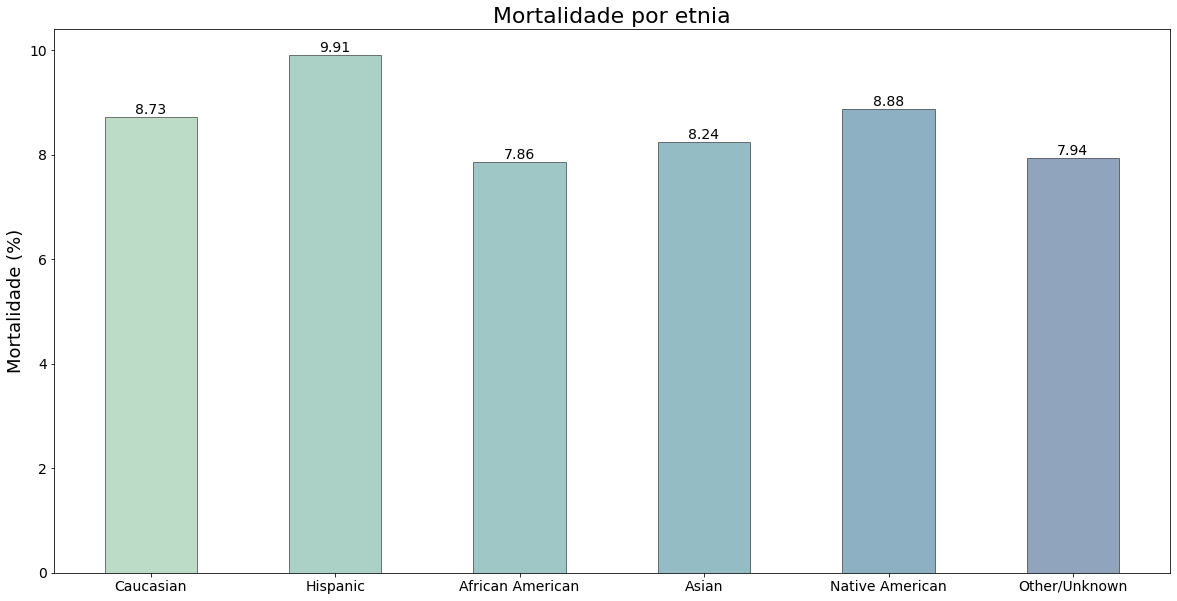

In [ ]:
x_data = ethnicity_types
y_data = [round(value * 100, 2) for value in death_ratio_ethnicity]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por etnia', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_etnia.png')
plt.show()

Vemos que existe uma leve variação na taxa de mortalidade a depender da etnia, e essa informação pode ser importante para a rede neural, e por isso a manteremos na base de dados.

In [ ]:
print('Quantidade de valores nulos no atributo gênero: ', data['gender'].isnull().sum())

Quantidade de valores nulos no atributo gênero:  25


In [ ]:
gender_types = list(dict.fromkeys(data['gender']))
gender_types.remove(numpy.nan)

death_ratio_gender = []
for gender in gender_types:
    qtd_death = len(death_data.loc[death_data['gender'].str.match(gender, na=False)])
    qtd_non_death = len(data.loc[data['gender'].str.match(gender, na=False)])
    death_ratio_gender.append(qtd_death / qtd_non_death)

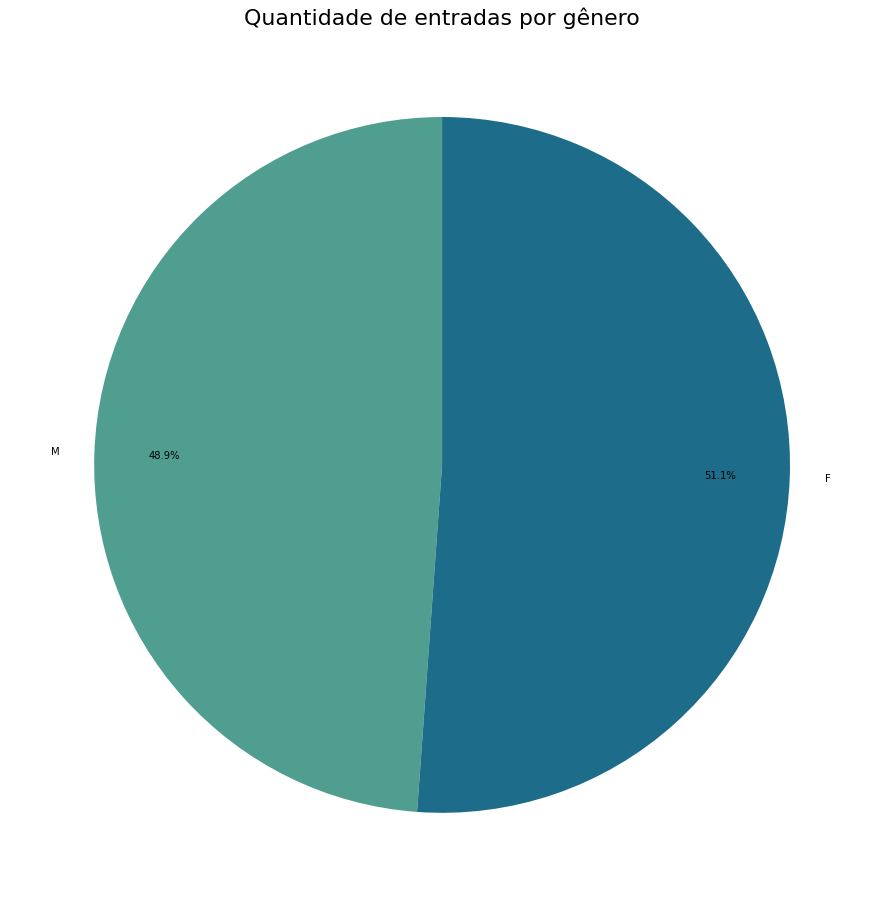

In [ ]:
values = death_ratio_gender
labels =gender_types
colors = seaborn.color_palette('crest', n_colors=2)

fig, ax = plt.subplots(figsize=(16, 16))
ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.8, labeldistance=1.1)
ax.set_title('Quantidade de entradas por gênero', fontsize=22)
fig.savefig('qtd_genero.png')
plt.show()

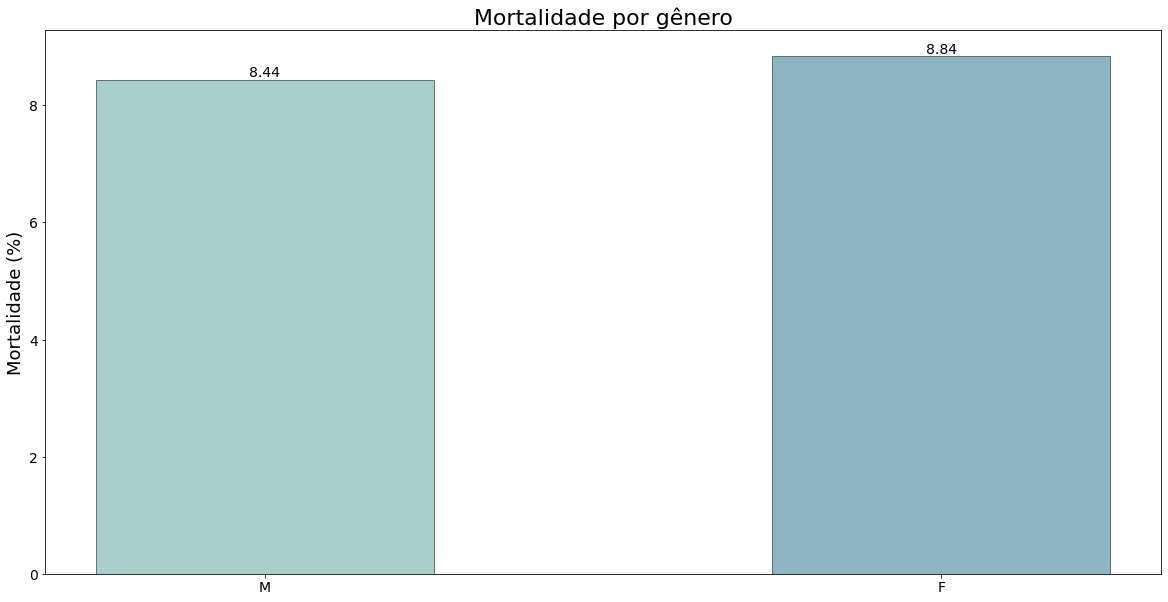

In [ ]:
x_data = gender_types
y_data = [round(value * 100, 2) for value in death_ratio_gender]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por gênero', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_genero.png')
plt.show()

Vemos que a quantidade de entradas por gênero é bastante equilibrada e não parece haver grande diferença na mortalidade quando olhando ao gênero. De fato, esperamos que a capacidade de detectar um óbito seja o a mesma independente do gênero, e por isso removeremos essa coluna.

In [ ]:
data = data.drop('gender', axis=1)
data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.42,0,Caucasian,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,25.0,31.95,0,Caucasian,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0


O atributo `icu_admit_source` se refere ao local onde o paciente se encontrava antes de ser transferido, verifiquemos se há valores desconhecidos para esse atributo.

In [ ]:
print('Quantidade de valores nulos no atributo icu_admit_source: ', data['icu_admit_source'].isnull().sum())

Quantidade de valores nulos no atributo icu_admit_source:  112


In [ ]:
icu_admit_sources = list(dict.fromkeys(data['icu_admit_source']))
icu_admit_sources.remove(numpy.nan)

death_ratio_source = []
for source in icu_admit_sources:
    qtd_death = len(death_data.loc[death_data['icu_admit_source'].str.match(source, na=False)])
    qtd_non_death = len(data.loc[data['icu_admit_source'].str.match(source, na=False)])
    death_ratio_source.append(qtd_death / qtd_non_death)

print('Valores em icu_admit_source: ', *icu_admit_sources, sep=' -- ')

Valores em icu_admit_source:  -- Floor -- Accident & Emergency -- Operating Room / Recovery -- Other Hospital -- Other ICU


Nesse caso não temos uma opção para origens desconhecidas do paciente. Optaremos então por atribuir a moda aos valores desconhecidos, uma vez que a baixa ocorrência não deve resultar em grandes imprecisões para a rede neural.

In [ ]:
moda = data['icu_admit_source'].mode()[0]
print('Moda de icu_admit_source: ', moda)
data['icu_admit_source'] = data['icu_admit_source'].fillna(moda)

Moda de icu_admit_source:  Accident & Emergency


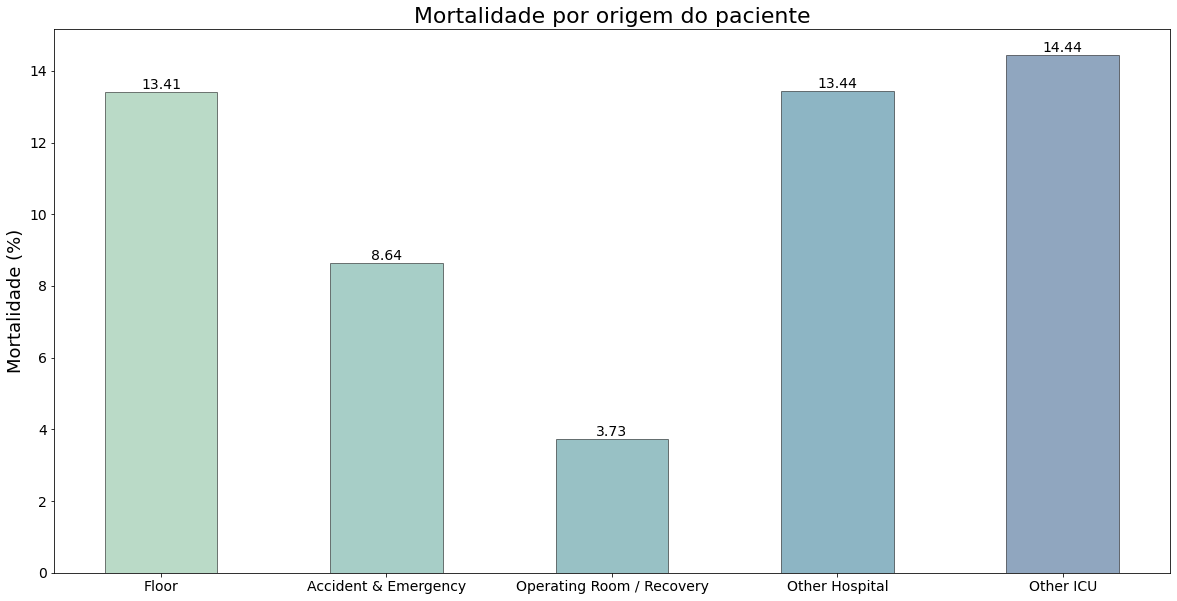

In [ ]:
x_data = icu_admit_sources
y_data = [round(value * 100, 2) for value in death_ratio_source]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por origem do paciente', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_origem.png')
plt.show()

In [ ]:
print('Quantidade de valores nulos no atributo icu_stay_type: ', data['icu_stay_type'].isnull().sum())
print('Quantidade de valores nulos no atributo icu_type: ', data['icu_type'].isnull().sum())

Quantidade de valores nulos no atributo icu_stay_type:  0
Quantidade de valores nulos no atributo icu_type:  0


Como podemos ver não há valores nulos nos atributos icu_stay_type e icu_type, que representam o tipo de estadia do paciente alocado na unidade e o tipo da unidade respectivamente. 

In [ ]:
icu_stay_types = list(dict.fromkeys(data['icu_stay_type']))
icu_types = list(dict.fromkeys(data['icu_type']))


death_ratio_icu_stay = []
for icu_type in icu_stay_types:
    qtd_death = len(death_data.loc[death_data['icu_stay_type'].str.match(icu_type, na=False)])
    qtd_non_death = len(data.loc[data['icu_stay_type'].str.match(icu_type, na=False)])
    death_ratio_icu_stay.append(qtd_death / qtd_non_death)

death_ratio_icu_type = []
for icu_type in icu_types:
    qtd_death = len(death_data.loc[death_data['icu_type'].str.match(icu_type, na=False)])
    qtd_non_death = len(data.loc[data['icu_type'].str.match(icu_type, na=False)])
    death_ratio_icu_type.append(qtd_death / qtd_non_death)
print(death_ratio_icu_stay)
print(death_ratio_icu_type)

print('Valores em icu_stay_type: ', *icu_stay_types, sep=' -- ')
print('Valores em icu_type: ', *icu_types, sep=' -- ')

[0.08516760846106541, 0.08928571428571429, 0.1056338028169014]
[0.06020484636522608, 0.08749456371328035, 0.07574063722750139, 0.0831270358306189, 0.12085769980506822, 0.07487041658667691, 0.10343383584589615, 0.055061781920659005]
Valores em icu_stay_type:  -- admit -- readmit -- transfer
Valores em icu_type:  -- CTICU -- Med-Surg ICU -- CCU-CTICU -- Neuro ICU -- MICU -- SICU -- Cardiac ICU -- CSICU


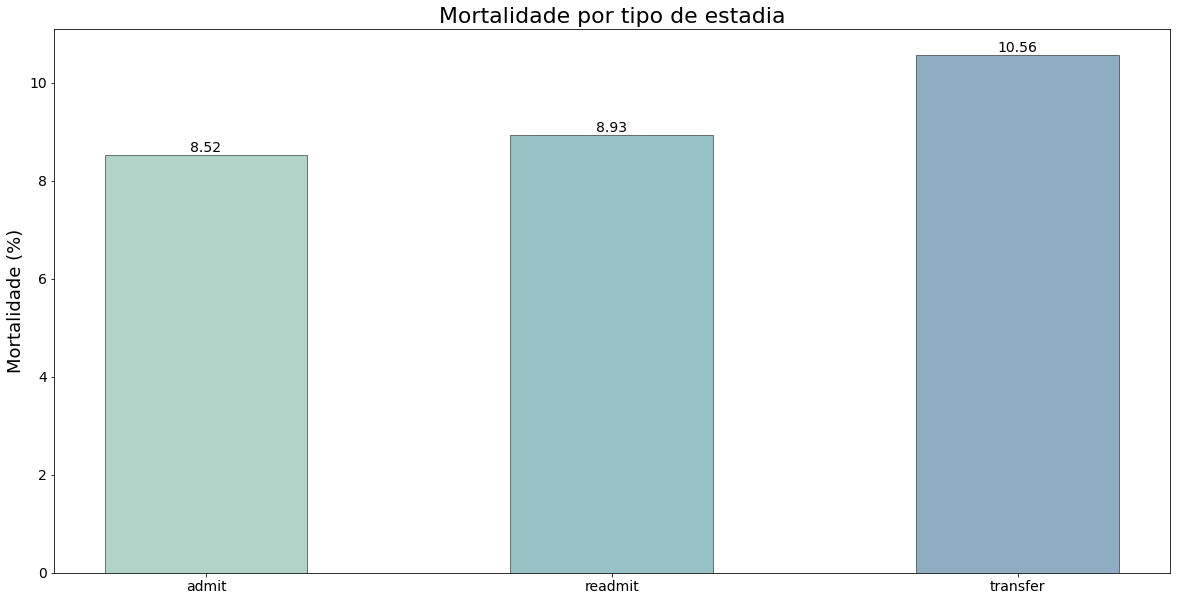

In [ ]:
x_data = icu_stay_types
y_data = [round(value * 100, 2) for value in death_ratio_icu_stay]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por tipo de estadia', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_estadia.png')
plt.show()

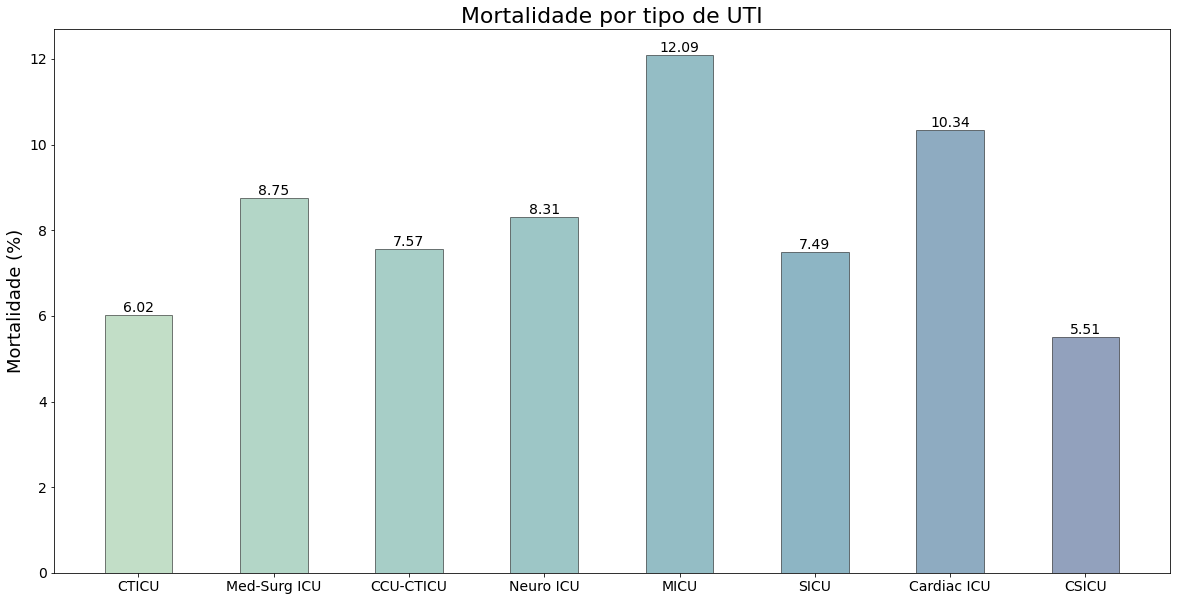

In [ ]:
x_data = icu_types
y_data = [round(value * 100, 2) for value in death_ratio_icu_type]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(20, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por tipo de UTI', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_uti_type.png')
plt.show()

In [ ]:
print('Quantidade de valores nulos no atributo apache_3j_bodysystem: ', data['apache_3j_bodysystem'].isnull().sum())
print('Quantidade de valores nulos no atributo apache_2_bodysystem: ', data['apache_2_bodysystem'].isnull().sum())

temp = data[data.apache_3j_bodysystem.isnull()]
print('Quantidade de entradas em que apache_3j_bodysystem é nulo e apache_2_bodysystem não é: ', len(temp[temp.apache_2_bodysystem.notnull()]))

Quantidade de valores nulos no atributo apache_3j_bodysystem:  1662
Quantidade de valores nulos no atributo apache_2_bodysystem:  1662
Quantidade de entradas em que apache_3j_bodysystem é nulo e apache_2_bodysystem não é:  0


Podemos ver que os valores que faltam no diagnóstico Apache 3 são os mesmos faltando no Apache 2. A solução para esses casos porém será resolvida posteriormente.

Em alguns casos o mesmo diagnóstico aparece escrito de forma diferente, no código seguinte resolvemos isso antes de continuar.

In [ ]:
data['apache_2_bodysystem'] = data['apache_2_bodysystem'].replace('Undefined diagnoses', 'Undefined Diagnoses')

In [ ]:
apache_3_types = list(dict.fromkeys(data['apache_3j_bodysystem']))
apache_2_types = list(dict.fromkeys(data['apache_2_bodysystem']))
apache_3_types.remove(numpy.nan)
apache_2_types.remove(numpy.nan)
apache_3_types.sort()
apache_2_types.sort()

print('Tipos de diagnóstico Apache 3: ', *apache_3_types, sep=' -- ')
print('Tipos de diagnóstico Apache 2: ', *apache_2_types, sep=' -- ')

Tipos de diagnóstico Apache 3:  -- Cardiovascular -- Gastrointestinal -- Genitourinary -- Gynecological -- Hematological -- Metabolic -- Musculoskeletal/Skin -- Neurological -- Respiratory -- Sepsis -- Trauma
Tipos de diagnóstico Apache 2:  -- Cardiovascular -- Gastrointestinal -- Haematologic -- Metabolic -- Neurologic -- Renal/Genitourinary -- Respiratory -- Trauma -- Undefined Diagnoses


In [ ]:
death_ratio_apache_3 = []
for a3type in apache_3_types:
    qtd_death = len(death_data.loc[death_data['apache_3j_bodysystem'].str.match(a3type, na=False)])
    qtd_non_death = len(data.loc[data['apache_3j_bodysystem'].str.match(a3type, na=False)])
    death_ratio_apache_3.append(qtd_death / qtd_non_death)

death_ratio_apache_2 = []
for a2type in apache_2_types:
    qtd_death = len(death_data.loc[death_data['apache_2_bodysystem'].str.match(a2type, na=False)])
    qtd_non_death = len(data.loc[data['apache_2_bodysystem'].str.match(a2type, na=False)])
    death_ratio_apache_2.append(qtd_death / qtd_non_death)

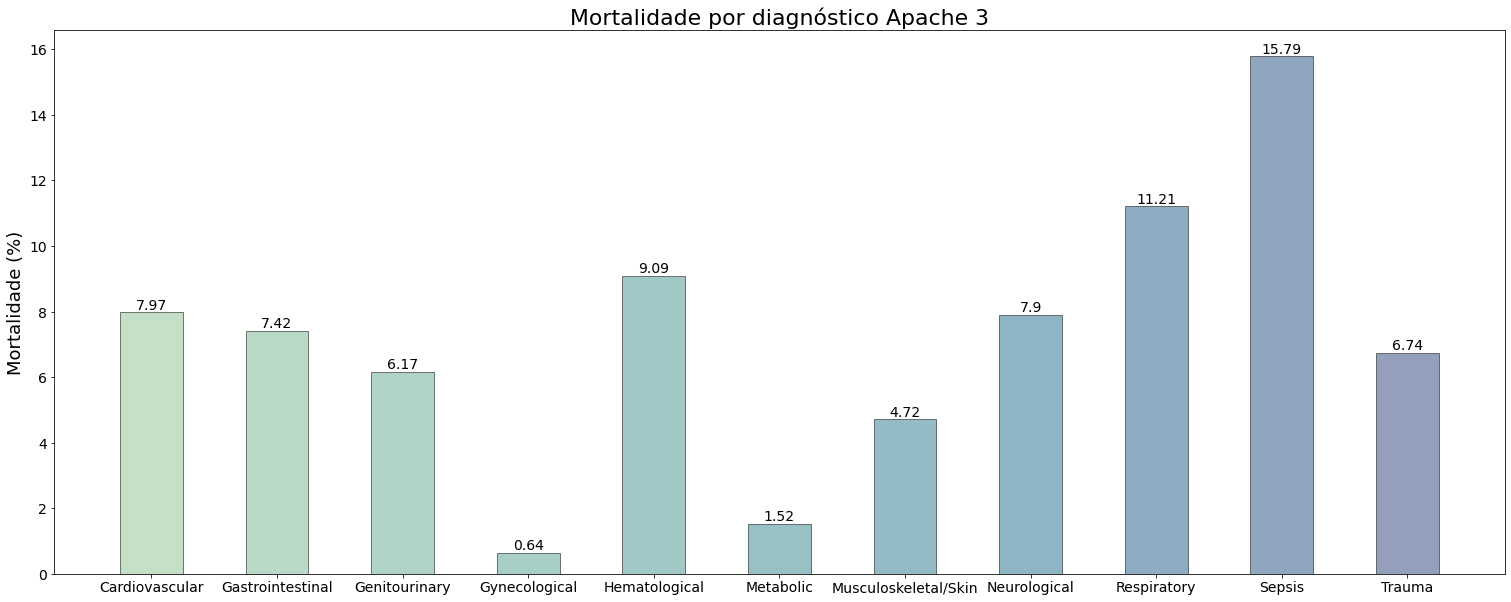

In [ ]:
x_data = apache_3_types
y_data = [round(value * 100, 2) for value in death_ratio_apache_3]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(26, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por diagnóstico Apache 3', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_apache_3.png')
plt.show()

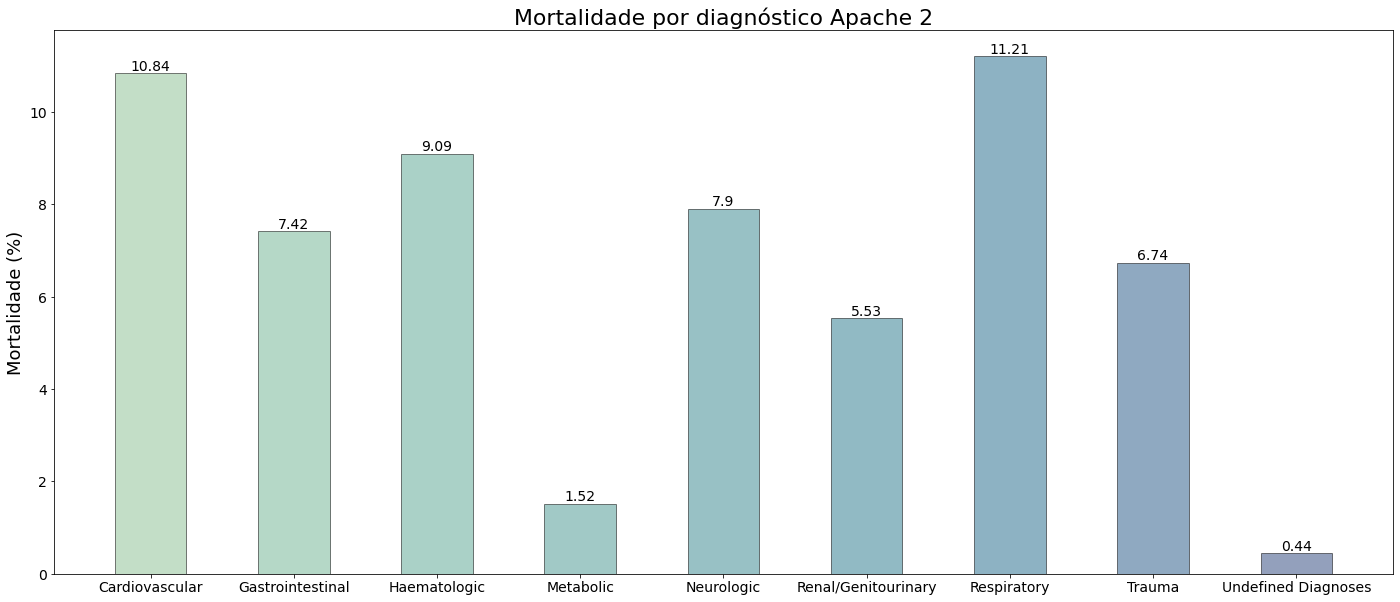

In [ ]:
x_data = apache_2_types
y_data = [round(value * 100, 2) for value in death_ratio_apache_2]
colors = seaborn.color_palette('crest', n_colors=len(x_data))

fig, ax = plt.subplots(figsize=(24, 10))
bar = ax.bar(x_data, y_data, color=colors, width=0.5, align='center', alpha=0.5, edgecolor='black')
ax.bar_label(bar, fontsize=14)
ax.tick_params(axis='both', labelsize=14)
ax.set_title('Mortalidade por diagnóstico Apache 2', fontsize=22)
ax.set_ylabel('Mortalidade (%)', fontsize=18)
fig.savefig('mortalidade_apache_2.png')
plt.show()

Os gráficos mostram que os últimos atributos podem vir a ser relevantes para a rede neural, logo todas serão mantidas com exceção da coluna referente ao diagnóstico Apache 2, que é uma versão menos precisa do diagnóstico Apache 3.

In [ ]:
data = data.drop('apache_2_diagnosis', axis=1)
data = data.drop('apache_2_bodysystem', axis=1)
data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,hospital_death
0,68.0,22.73,0,Caucasian,180.3,Floor,admit,CTICU,0.541667,73.9,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,0
1,77.0,27.42,0,Caucasian,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,0
2,25.0,31.95,0,Caucasian,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,0
3,81.0,22.64,1,Caucasian,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,0
4,19.0,NaN,0,Caucasian,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,0


In [ ]:
data.isnull().sum()

age                              4228
bmi                              3429
elective_surgery                    0
ethnicity                           0
height                           1334
icu_admit_source                    0
icu_stay_type                       0
icu_type                            0
pre_icu_los_days                    0
weight                           2720
apache_3j_diagnosis              1101
apache_post_operative               0
arf_apache                        715
gcs_eyes_apache                  1901
gcs_motor_apache                 1901
gcs_unable_apache                1037
gcs_verbal_apache                1901
heart_rate_apache                 878
intubated_apache                  715
map_apache                        994
resprate_apache                  1234
temp_apache                      4108
ventilated_apache                 715
d1_diasbp_max                     165
d1_diasbp_min                     165
d1_diasbp_noninvasive_max        1040
d1_diasbp_no

In [ ]:
incomplete_data = data[data.isnull().any(axis=1)]
incomplete_data.head()

,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
2,25.0,31.95,0,Caucasian,172.7,Accident & Emergency,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,81.0,22.64,1,Caucasian,165.1,Operating Room / Recovery,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,19.0,NaN,0,Caucasian,188.0,Accident & Emergency,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
6,59.0,57.45,0,Caucasian,165.1,Accident & Emergency,admit,Med-Surg ICU,0.000694,156.6,108.0,203.01,0,0.0,4.0,6.0,0.0,5.0,133.0,1.0,138.0,53.0,35.0,1.0,76.0,68.0,76.0,68.0,112.0,70.0,117.0,97.0,117.0,97.0,38.0,16.0,100.0,87.0,151.0,133.0,151.0,133.0,37.2,35.0,107.0,79.0,NaN,NaN,79.0,72.0,117.0,117.0,117.0,117.0,18.0,18.0,100.0,100.0,191.0,163.0,NaN,NaN,197.0,129.0,5.0,4.2,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
7,70.0,NaN,0,Caucasian,165.0,Accident & Emergency,admit,Med-Surg ICU,0.002083,NaN,113.0,501.05,0,0.0,4.0,6.0,0.0,5.0,120.0,0.0,60.0,28.0,36.6,1.0,84.0,46.0,84.0,46.0,118.0,86.0,114.0,60.0,114.0,60.0,28.0,12.0,100.0,92.0,147.0,71.0,147.0,71.0,38.5,36.6,74.0,55.0,74.0,55.0,118.0,114.0,88.0,60.0,88.0,60.0,28.0,26.0,96.0,92.0,119.0,106.0,119.0,106.0,129.0,129.0,5.8,2.4,0.11,0.06,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0


In [ ]:
print('{}% dos dados estão incompletos'.format(round(len(incomplete_data) / len(data) * 100, 2)))

37.2% dos dados estão incompletos


`37,92%` dos dados contém valores desconhecidos, existem várias formas de lidar com isso, e iremos testar 3 delas.

#### Remoção de dados incompletos da base de dados

In [ ]:
complete_data = data[data.isnull().any(axis=1) == False]
print('Quantidade de dados completos: ', len(complete_data))
complete_data.head()

Quantidade de dados completos:  57598


,age,bmi,elective_surgery,ethnicity,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,Caucasian,180.3,Floor,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,77.0,27.420000,0,Caucasian,160.0,Floor,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
5,67.0,27.560000,0,Caucasian,190.5,Accident & Emergency,admit,Med-Surg ICU,0.000694,100.0,301.0,403.01,0,0.0,4.0,6.0,0.0,5.0,113.0,0.0,130.0,35.0,36.6,0.0,100.0,61.0,100.0,61.0,113.0,83.0,127.0,80.0,127.0,80.0,32.0,10.0,97.0,91.0,173.0,107.0,173.0,107.0,36.8,36.6,89.0,89.0,89.0,89.0,83.0,83.0,111.0,111.0,111.0,111.0,12.0,12.0,97.0,97.0,143.0,143.0,143.0,143.0,156.0,125.0,3.9,3.7,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0
9,50.0,25.710000,0,Other/Unknown,175.3,Accident & Emergency,admit,CCU-CTICU,0.060417,79.0,112.0,107.01,0,0.0,4.0,6.0,0.0,5.0,94.0,0.0,58.0,46.0,36.3,0.0,83.0,48.0,83.0,48.0,96.0,57.0,101.0,59.0,101.0,59.0,44.0,14.0,100.0,96.0,135.0,78.0,135.0,78.0,37.1,36.4,83.0,61.0,83.0,61.0,96.0,60.0,101.0,77.0,101.0,77.0,29.0,17.0,100.0,96.0,135.0,103.0,135.0,103.0,134.0,134.0,4.1,3.3,0.02,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
10,72.0,28.257052,1,Hispanic,154.9,Operating Room / Recovery,admit,Med-Surg ICU,0.004861,67.8,303.0,1304.08,1,0.0,4.0,6.0,0.0,5.0,101.0,0.0,72.0,15.0,36.8,0.0,72.0,53.0,72.0,53.0,101.0,67.0,93.0,70.0,93.0,70.0,23.0,14.0,99.0,92.0,145.0,95.0,145.0,95.0,37.0,36.7,72.0,56.0,72.0,56.0,90.0,70.0,91.0,87.0,91.0,87.0,23.0,14.0,99.0,93.0,145.0,114.0,145.0,114.0,158.0,133.0,4.2,4.2,0.01,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [ ]:
complete_data.to_csv('complete_data.csv', index=False)